# Reference

https://github.com/rafaelanchieta/essay 

https://research.google.com/colaboratory/local-runtimes.html 

# Approach

## Strategy 1


Feed the Neural Networks with the Essays, use NN for Regression, trying to
predict the final grade

## Strategy 2

Manually correct some essay competences, feed the NN with the essays, use NN for Regression, trying to predict the final grade without the competences that were manually corrected, then add the grade of the competences manually corrected

# Strategy 3

Feed the NN with the Essays, use NN for Classification with 10 classes, [0-100], [101-200], ..., [901-1000] scores.

# Strategy 4

Feed the NN with the Essays, use NN for Classification with 2 classes 0 and 1

## Upload the dataset

In [ ]:
!cp -r /content/drive/MyDrive/TCC/* .

# Installing Libraries


In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

# Loading Data

In [ ]:
from build_dataset import Corpus

In [ ]:
c = Corpus()
c.read_corpus()
#train, valid, test = c.read_splits()

,prompt,title,essay,competence,score
0,21,A greve dos caminhoneiros e a malha ferroviária,[A grande importância dos caminhoneiros para o...,"[160, 160, 120, 120, 120]",680
1,23,"Vossa excelência Senador M. M.,",[O senhor e eu já estamos cientes do projeto d...,"[160, 160, 120, 120, 120]",680
2,39,A validade do impeachment,[É de conhecimento geral dos brasileiros o quã...,"[120, 160, 160, 160, 120]",720
3,26,Podemos perceber que a sociedade brasileira,[Podemos perceber que a sociedade brasileira e...,"[120, 120, 80, 120, 120]",560
4,4,Comenta-se que o ex-presidente Lula,[Comenta-se que o ex presidente Lula ex-presid...,"[0, 0, 0, 0, 0]",0
...,...,...,...,...,...
4565,43,redes sociais,"[Em constante evolução tecnológica , o mundo e...","[160, 120, 120, 120, 120]",640
4566,60,Reforma da Previdência uma solução para o Brasil.,"[“O importante da vida não é viver, mas viver ...","[120, 80, 80, 120, 80]",480
4567,44,"lados opostos, mesmo problema",[O esporte – seja qual for – é comporto por re...,"[160, 200, 160, 200, 200]",920
4568,49,Da Ficção à Realidade,"[José Saramago, proeminente escritor e dramatu...","[160, 160, 160, 160, 160]",800


In [ ]:
train, valid, test = c.read_splits()

In [ ]:
df = train.copy()

In [ ]:
print(f"Train shape: {train.shape}")
print(f"Validation shape: {valid.shape}")
print(f"Test shape: {test.shape}")


Train shape: (3198, 5)
Validation shape: (686, 5)
Test shape: (686, 5)


# Imports

In [ ]:
from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import Dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Analysis

## Essays Length

In [ ]:
# Join all the paragraphs of an essay in a same string
aux = df['essay'].map( lambda x : ''.join(x))
length_array = aux.map(lambda x: len(x))

In [ ]:
print(f"The essays length mean is: {np.mean( length_array )}")
print(f"The essays length median is: {np.median( length_array )}")
print(f"The minimum essays length is: {np.min( length_array )}")
print(f"The maximum essays length is: {np.max( length_array )}")

The essays length mean is: 1819.8055034396498
The essays length median is: 1804.0
The minimum essays length is: 497
The maximum essays length is: 5109


<ipython-input-14-ecc9a746ee21>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( length_array );


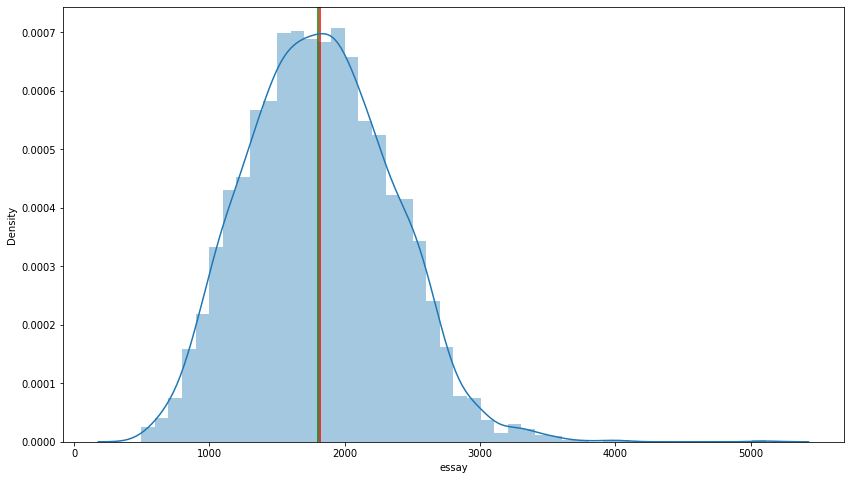

In [ ]:
plt.figure(figsize=(14, 8))

# mean in Red
plt.axvline(x=np.mean(length_array), ymin=0, ymax=1, label='mean', color='r')
# median in Green
plt.axvline(x=np.median(length_array), ymin=0, ymax=1, label='median', color='g')


sns.distplot( length_array );


## Grades Distribution

In [ ]:
aux = df.copy()


<ipython-input-16-9029ee7a2451>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( aux['score'] );


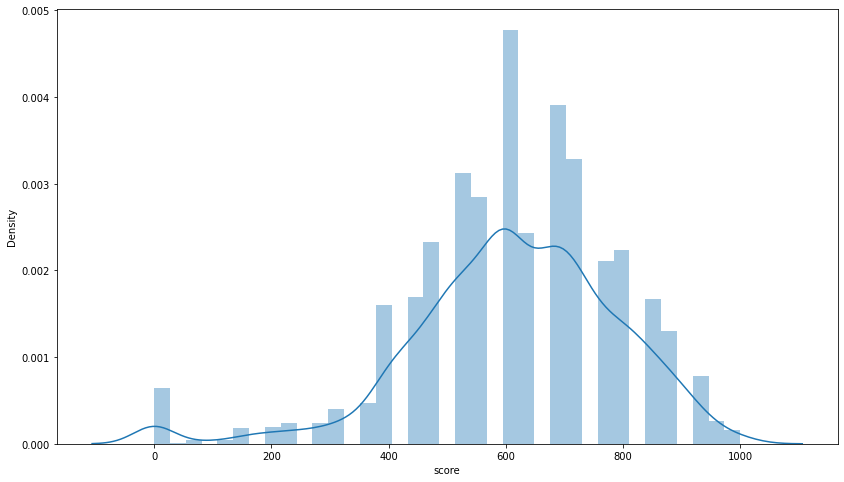

In [ ]:
plt.figure(figsize=(14, 8))

# mean in Red
#plt.axvline(x=np.mean(length_array), ymin=0, ymax=1, label='mean', color='r')
# median in Green
#plt.axvline(x=np.median(length_array), ymin=0, ymax=1, label='median', color='g')


sns.distplot( aux['score'] );


In [ ]:
aux.shape

(3198, 5)

In [ ]:
aux[ (aux['score'] >= 0) & (aux['score'] < 500) ].shape

(701, 5)

In [ ]:
aux[ (aux['score'] >= 500) & (aux['score'] < 700) ].shape

(1477, 5)

In [ ]:
aux[ (aux['score'] >= 700) & (aux['score'] < 1001) ].shape

(1020, 5)

## Competences distribution

In [ ]:
aux = df.copy()

In [ ]:
aux['competence_1'] = aux['competence'].apply(lambda x: x[0])
aux['competence_2'] = aux['competence'].apply(lambda x: x[1])
aux['competence_3'] = aux['competence'].apply(lambda x: x[2])
aux['competence_4'] = aux['competence'].apply(lambda x: x[3])
aux['competence_5'] = aux['competence'].apply(lambda x: x[4])

<ipython-input-23-868b9170d014>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( aux['competence_1'] );


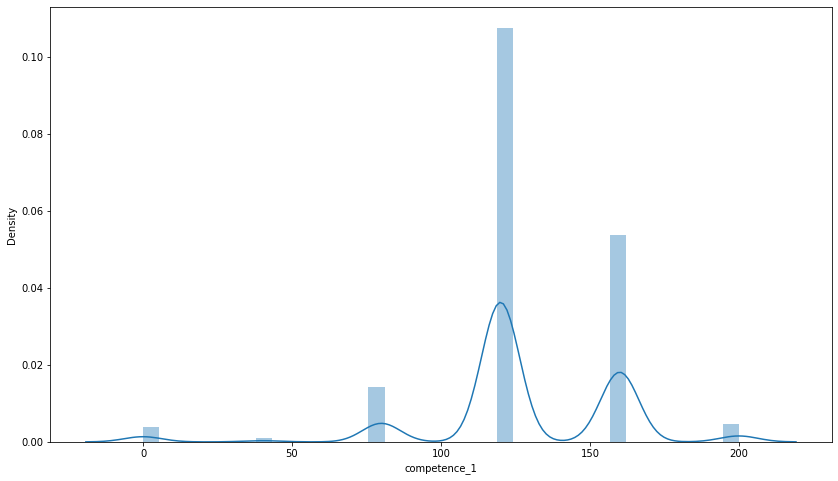

In [ ]:
plt.figure(figsize=(14, 8))
sns.distplot( aux['competence_1'] );

<ipython-input-24-e6ed4c3db849>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( aux['competence_2'] );


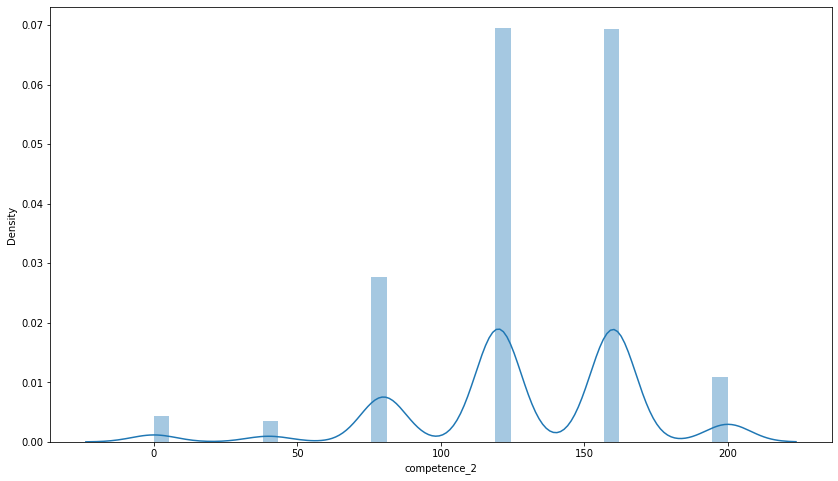

In [ ]:
plt.figure(figsize=(14, 8))
sns.distplot( aux['competence_2'] );

<ipython-input-25-e5bdeae25b02>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( aux['competence_3'] );


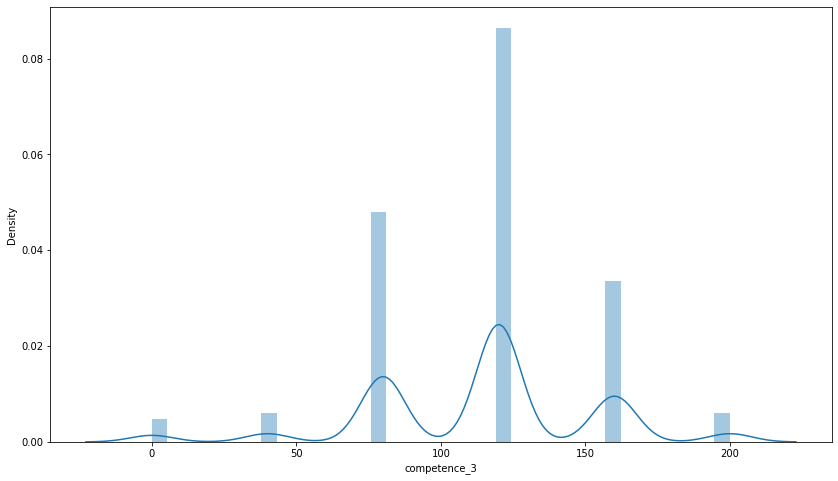

In [ ]:
plt.figure(figsize=(14, 8))
sns.distplot( aux['competence_3'] );

<ipython-input-26-5d9a16e432b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( aux['competence_4'] );


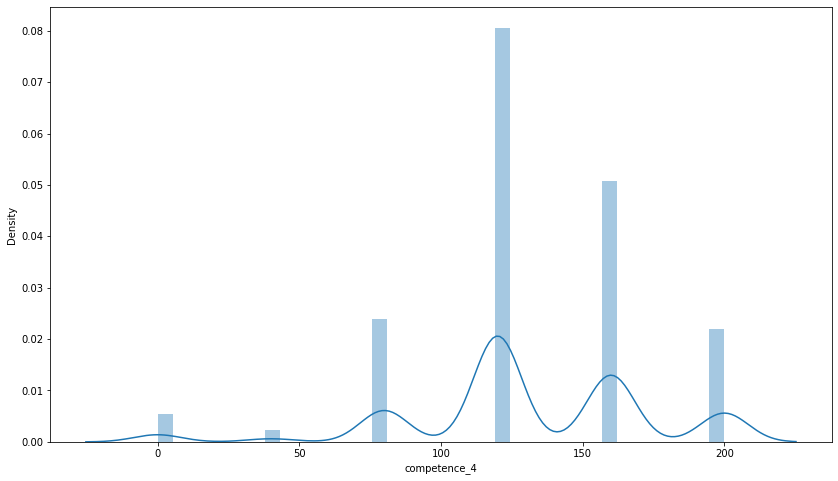

In [ ]:
plt.figure(figsize=(14, 8))
sns.distplot( aux['competence_4'] );

<ipython-input-27-7d3013a928f1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( aux['competence_5'] );


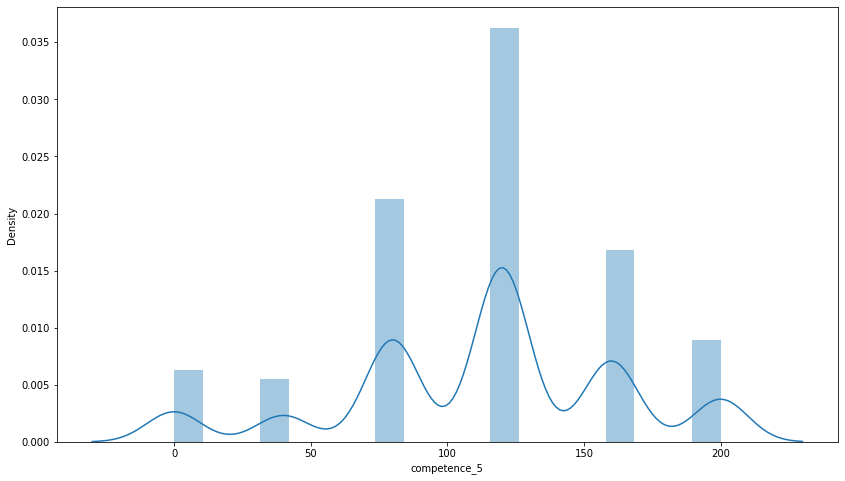

In [ ]:
plt.figure(figsize=(14, 8))
sns.distplot( aux['competence_5'] );

## Essays Tokens Analysis

#### BERT uses a subword tokenizer (WordPiece), so the maximum length corresponds to 512 subword tokens. 

In [ ]:
# Join all the paragraphs of an essay in a same string
aux = df.copy()
aux['essay'] = aux['essay'].map( lambda x : ''.join(x))


In [ ]:
# Model Name
checkpoint = "neuralmind/bert-base-portuguese-cased"

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained( checkpoint ) 

def tokenize_function_aux( example ):
  return tokenizer.tokenize(
      example,
      add_special_tokens=True,
      return_attention_mask=True
  )

aux['tokens'] = aux['essay'].apply(lambda x: tokenize_function_aux(x))
aux['tokens_length'] = aux['tokens'].apply(lambda x: len(x))

In [ ]:
aux.sample(2)

,prompt,title,essay,competence,score,tokens,tokens_length
1302,44,Os limites às regras da competição.,É notável o quanto o debate sobre a diversidad...,"[200, 160, 160, 160, 120]",800,"[[CLS], É, notável, o, quanto, o, debate, sobr...",535
2517,66,Mudança de atitude e cuidado,"Do Google à Apple e à Amazon, o truque está em...","[120, 80, 80, 80, 80]",440,"[[CLS], Do, Google, à, Apple, e, à, Amazon, ,,...",603


### Distribuition Graph of Tokens Length per Essay

<ipython-input-31-592d0e00c39f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( aux['tokens_length'] );


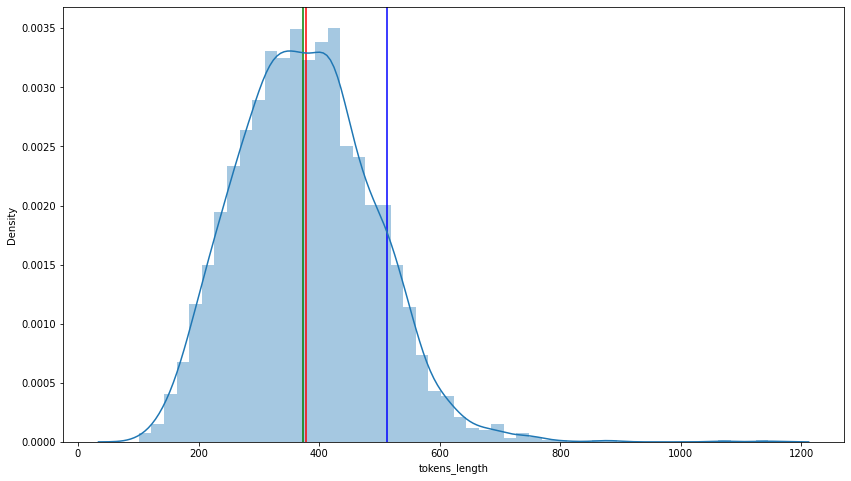

In [ ]:
plt.figure(figsize=(14, 8));

# mean in Red
plt.axvline(x=np.mean(aux['tokens_length']), ymin=0, ymax=1, label='mean', color='r');
# median in Green
plt.axvline(x=np.median(aux['tokens_length']), ymin=0, ymax=1, label='median', color='g');
# 512 tokens_length
plt.axvline(x=512, ymin=0, ymax=1, label='median', color='b');

sns.distplot( aux['tokens_length'] );

#### As BERT uses a subword tokenizer (WordPiece), that the maximum length corresponds to 512 subword tokens, we will lose ~12% of our training dataset 

In [ ]:
miss_data = len( aux[ aux['tokens_length'] > 512 ] )
print(f'Train dataset size: {aux.shape[0]}')
print(f'Miss data size: {miss_data}')
print(f'Miss data percentage: {miss_data / aux.shape[0]}')

Train dataset size: 3198
Miss data size: 375
Miss data percentage: 0.11726078799249531


## Score Essays

In [ ]:
df.score

0       440
1       480
2       440
3       640
4       560
       ... 
3193    360
3194    640
3195    600
3196    680
3197    480
Name: score, Length: 3198, dtype: int64

In [ ]:
print(f"The essays score mean is: {np.mean( df['score'] )}")
print(f"The essays score median is: {np.median( df['score'] )}")
print(f"The minimum essays score is: {np.min( df['score'] )}")
print(f"The maximum essays score is: {np.max( df['score'] )}")

The essays score mean is: 614.4965603502189
The essays score median is: 600.0
The minimum essays score is: 0
The maximum essays score is: 1000


<ipython-input-35-69ea898fe2dd>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df['score'] );


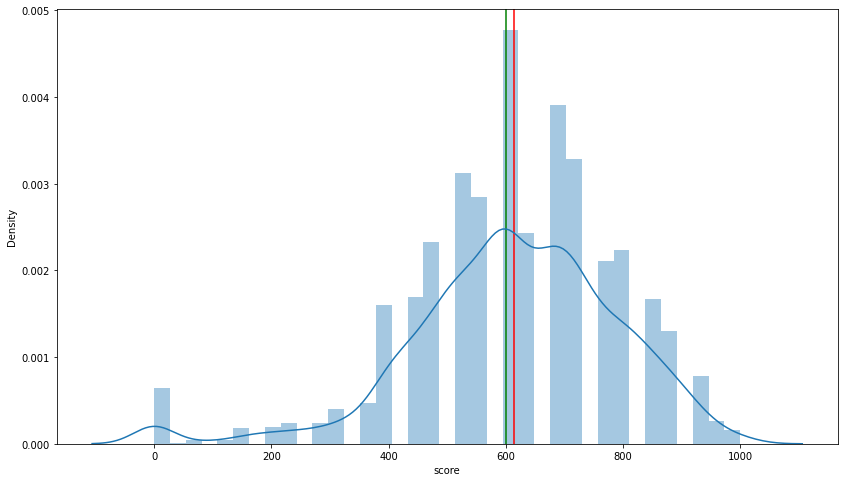

In [ ]:
plt.figure(figsize=(14, 8))

# mean in Red
plt.axvline(x=np.mean(df['score']), ymin=0, ymax=1, label='mean', color='r')
# median in Green
plt.axvline(x=np.median(df['score']), ymin=0, ymax=1, label='median', color='g')


sns.distplot( df['score'] );


# Tokenization

In [ ]:
df2 = df.copy()

In [ ]:
# Join all the paragraphs of an essay in a same string
df2['essay'] = df2['essay'].map( lambda x : ''.join(x))
valid['essay'] = valid['essay'].map( lambda x : ''.join(x))

# Y Labels

# TESTE 1
df2['labels'] = df2['score'].apply( lambda x : 1 if x > 500 else 0)
valid['labels'] = valid['score'].apply( lambda x : 1 if x > 500 else 0)

"""
# TESTE 2
df2['labels'] = df2['score'].apply( lambda x : 0 if x < 500 else 2 if (x >= 700) else 1 )
valid['labels'] = valid['score'].apply(  lambda x : 0 if x < 500 else 2 if (x >= 700) else 1 )
"""

"\n# TESTE 2\ndf2['labels'] = df2['score'].apply( lambda x : 0 if x < 500 else 2 if (x >= 700) else 1 )\nvalid['labels'] = valid['score'].apply(  lambda x : 0 if x < 500 else 2 if (x >= 700) else 1 )\n"

In [ ]:
# Convert Pandas dataframe to hugging face Dataset
df2_dataset = Dataset.from_pandas( df2 );

valid_dataset = Dataset.from_pandas( valid )

In [ ]:
# Model Name
checkpoint = "neuralmind/bert-base-portuguese-cased"

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


def tokenize_function(example):
    return tokenizer(example['essay'],
                     add_special_tokens=True,
                     padding='max_length',
                     truncation='longest_first',
                     max_length=512,
                     return_attention_mask=True)

tokenized_train = df2_dataset.map(tokenize_function, batched=True)

tokenized_valid = valid_dataset.map(tokenize_function, batched=True)


data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

Map:   0%|          | 0/3198 [00:00<?, ? examples/s]

Map:   0%|          | 0/686 [00:00<?, ? examples/s]

In [ ]:
tf_train_dataset = tokenized_train.to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)
tf_validation_dataset = tokenized_valid.to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


# Training

In [ ]:
n_labels = 2

In [ ]:
from transformers.models.auto.modeling_tf_auto import TFAutoModelForPreTraining
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=n_labels)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier', 'bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
"""
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer="adam",
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
)
"""

'\nfrom tensorflow.keras.losses import MeanAbsoluteError\nfrom tensorflow.keras.losses import SparseCategoricalCrossentropy\n\nmodel.compile(\n    optimizer="adam",\n    loss=SparseCategoricalCrossentropy(from_logits=True),\n    metrics=["accuracy"],\n)\nmodel.fit(\n    tf_train_dataset,\n    validation_data=tf_validation_dataset,\n)\n'

In [ ]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay

batch_size = 8
num_epochs = 1
# The number of training steps is the number of samples in the dataset, divided by the batch size then multiplied
# by the total number of epochs. Note that the tf_train_dataset here is a batched tf.data.Dataset,
# not the original Hugging Face Dataset, so its len() is already num_samples // batch_size.
num_train_steps = len(tf_train_dataset) * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=5e-5, end_learning_rate=0.0, decay_steps=num_train_steps
)
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=lr_scheduler)

In [ ]:
import tensorflow as tf

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=n_labels)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier', 'bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.fit(tf_train_dataset, validation_data=tf_validation_dataset, epochs=1)

290/400 [====================>.........] - ETA: 1:44:30 - loss: 0.4429 - accuracy: 0.8017

In [ ]:
preds = model.predict(tf_validation_dataset)["logits"]

maxlogits = np.max(preds, axis=1)

# Use Sigmoid to transform logits in the range [0,1]
z = 1/(1 + np.exp(-maxlogits))

In [ ]:
valid['predict'] = z
valid['scorePredict'] = ( z * 1000).astype(int)

## Evaluate

In [ ]:
# lambda x : 1 if x > 500 else 0
# lambda x : 0 if x < 500 else 2 if (x >= 700) else 1
valid['labelsPredict'] = valid['scorePredict'].apply( lambda x : 1 if x > 500 else 0 )
valid

In [ ]:
def accuracy(y, yhat):
    hits = 0
    for i in range(len(y)):
        hits = hits + int(y[i] == yhat[i])
    return hits / len(y)

accuracy(valid['labels'], valid['labelsPredict'])


### TESTE 1:

**TOKENIZER**

padding='max_length',
truncation='longest_first',
max_length=200, 


**MODEL**

batch_size = 8,
num_epochs = 1

**Y - LABEL**

  2 CLASSES ( 1 if x > 500 else 0 )

**ACCURACY (VAL)**: 0.8

### TESTE 2:

**TOKENIZER**

padding='max_length',
truncation='longest_first',
max_length=512, 


**MODEL**

batch_size = 8,
num_epochs = 1

**Y - LABEL**

  2 CLASSES ( 1 if x > 500 else 0 )

**ACCURACY (VAL)**:

In [ ]:
# Calculate MAE
print(f"The MAE is: {np.mean( np.abs(valid['scorePredict'] - valid['score']) )}")


In [ ]:
aux = valid[['score', 'scorePredict']].sort_values(by='score')
plt.figure(figsize=(16, 10))
plt.plot(np.linspace(0,685, 686), aux['score']);
plt.plot(np.linspace(0,685, 686), aux['scorePredict']);

In [ ]:
nIntervals = 20
intervalScore = []
indexInterval = []

for i in range(nIntervals):
  init = i * (1000 // nIntervals)
  end = (i+1) * (1000 // nIntervals)
  indexInterval.append( i* )
  intervalScore.append( np.mean( aux[ (aux['score'] > init) & (aux['score'] < end) ]['scorePredict'] ) )
  
intervalScore

plt.figure(figsize=(16, 10))
plt.plot(np.linspace(0,685, 686), aux['score']);
plt.plot(indexInterval, intervalScore);

In [ ]:
1000 // 20

In [ ]:
aux = valid[['score', 'scorePredict']].sort_values(by='scorePredict')
plt.plot(np.linspace(0,685, 686), aux['score']);
plt.plot(np.linspace(0,685, 686), aux['scorePredict']);


In [ ]:
aux

# Evaluating

In [ ]:
"""
import evaluate

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=class_preds, references=raw_datasets["validation"]["label"])
"""

'\nimport evaluate\n\nmetric = evaluate.load("glue", "mrpc")\nmetric.compute(predictions=class_preds, references=raw_datasets["validation"]["label"])\n'